<a href="https://colab.research.google.com/github/Brettbyers2005/CISC121-Assignment-1/blob/main/CISC_121_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cisc 121 - Section 001 - Assignment 2**

- Brett Byers
- 001
- 20464377
- Github link later
- links to chats

# Part 1: Basic Data Structures and Algorithim Problems

**1. Sum of two integers**

1. Understanding and Breakdown

Goal:
- The problem is looking to add two integers (a and b), without using + or -. The trick being used here to use bitwise operations.

Datatypes:
- Since a and b are integers and therefore could be positive, negative or 0 we must treat them as 32 bit signed integers to keep results consistent with problem constraints.

Operations:

- ^ gives sum of bits (no carying)
- & finds both bits where the carry is present (1).
- << 1 it shifts carry left

Algorithim thinking:
1. While carry is still active: store sum = a ^ b, then update and set.
2. return 'a,' as final
3. Apply masking to handle negatives if the number goes outside the 32 bit range.

Pillars of computation:
- Problem decomposition: Addition being broken down into a simpler form
- Pattern Recognition: Understanding how digital addition works bit by bit.
- Abstraction: Ignoring the actual arithmetic symbol and focusing on logical bit operations.
- Algorithmic Thinking: Looping the XOR/And/shift process until there is no more carry.

Flow Chart:
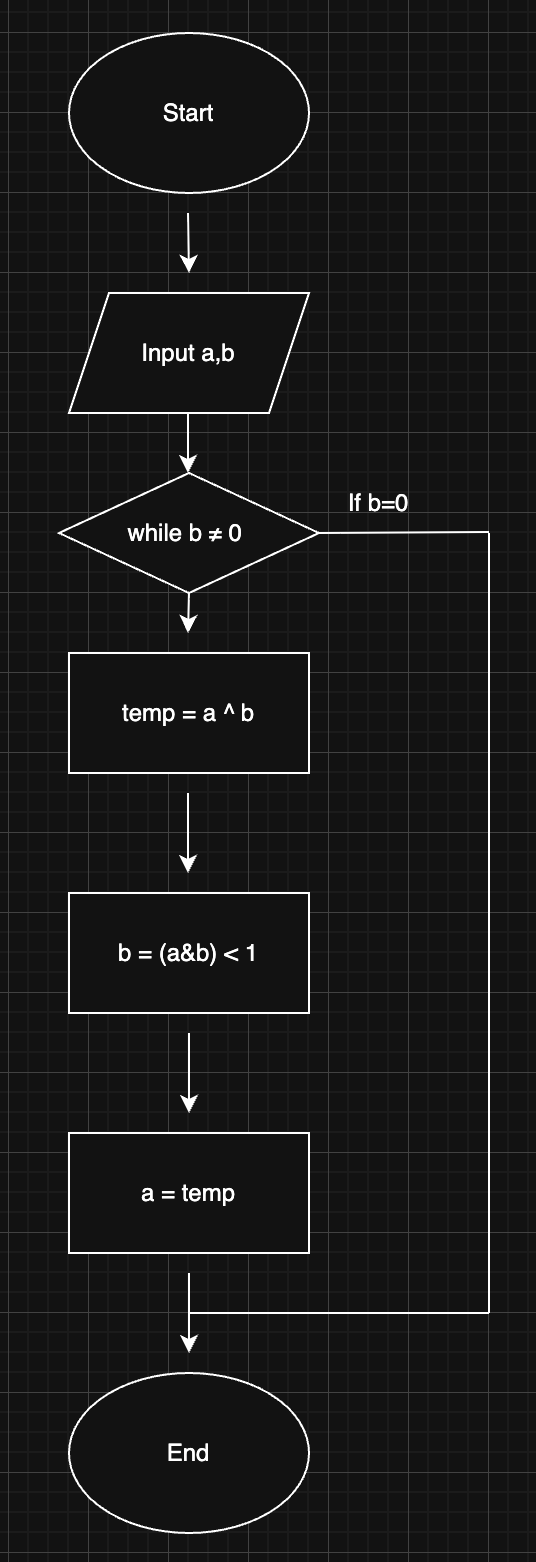


2. Peer Reveiw and draft code

link: https://leetcode.com/problems/sum-of-two-integers/solutions/84279/python-solution/

In [ ]:

def getSum(a, b):

    while b != 0:
        s = a ^ b
        c = (a & b) << 1
        a, b = s, c
    return a


In the solution I looked at, it creates a list of two numbers then just calls the sum. It does in theory solve the problem but not the way the assignment wants. So I took inspiration in the structure but changed it to what the assignment wanted.

3. Final Correct Code

In [3]:

def getSum(a, b):
    MASK = 0xFFFFFFFF      # keep lowest 32 bits
    MAX  = 0x7FFFFFFF      # max positive in signed 32-bit

    while b != 0:
        # partial sum without carry (limit to 32 bits)
        s = (a ^ b) & MASK
        # carry where both bits are 1, then shift left (limit to 32 bits)
        c = ((a & b) << 1) & MASK
        a, b = s, c

    # convert to signed if the high 31st bit is set
    return a if a <= MAX else ~(a ^ MASK)
"""
in this code ai (ChatGPT) helped me to reconize adding the mask = and max = to keep
lowest 32 bits and as well the max positive signed 32-bit.
"""










'\nin this code ai helped me to reconize adding the mask = and max = to keep \nlowest 32 bits and as well the max positive signed 32-bit. As well as giving me\nsome testing examples to use for code. \n'

Solution screenshot:
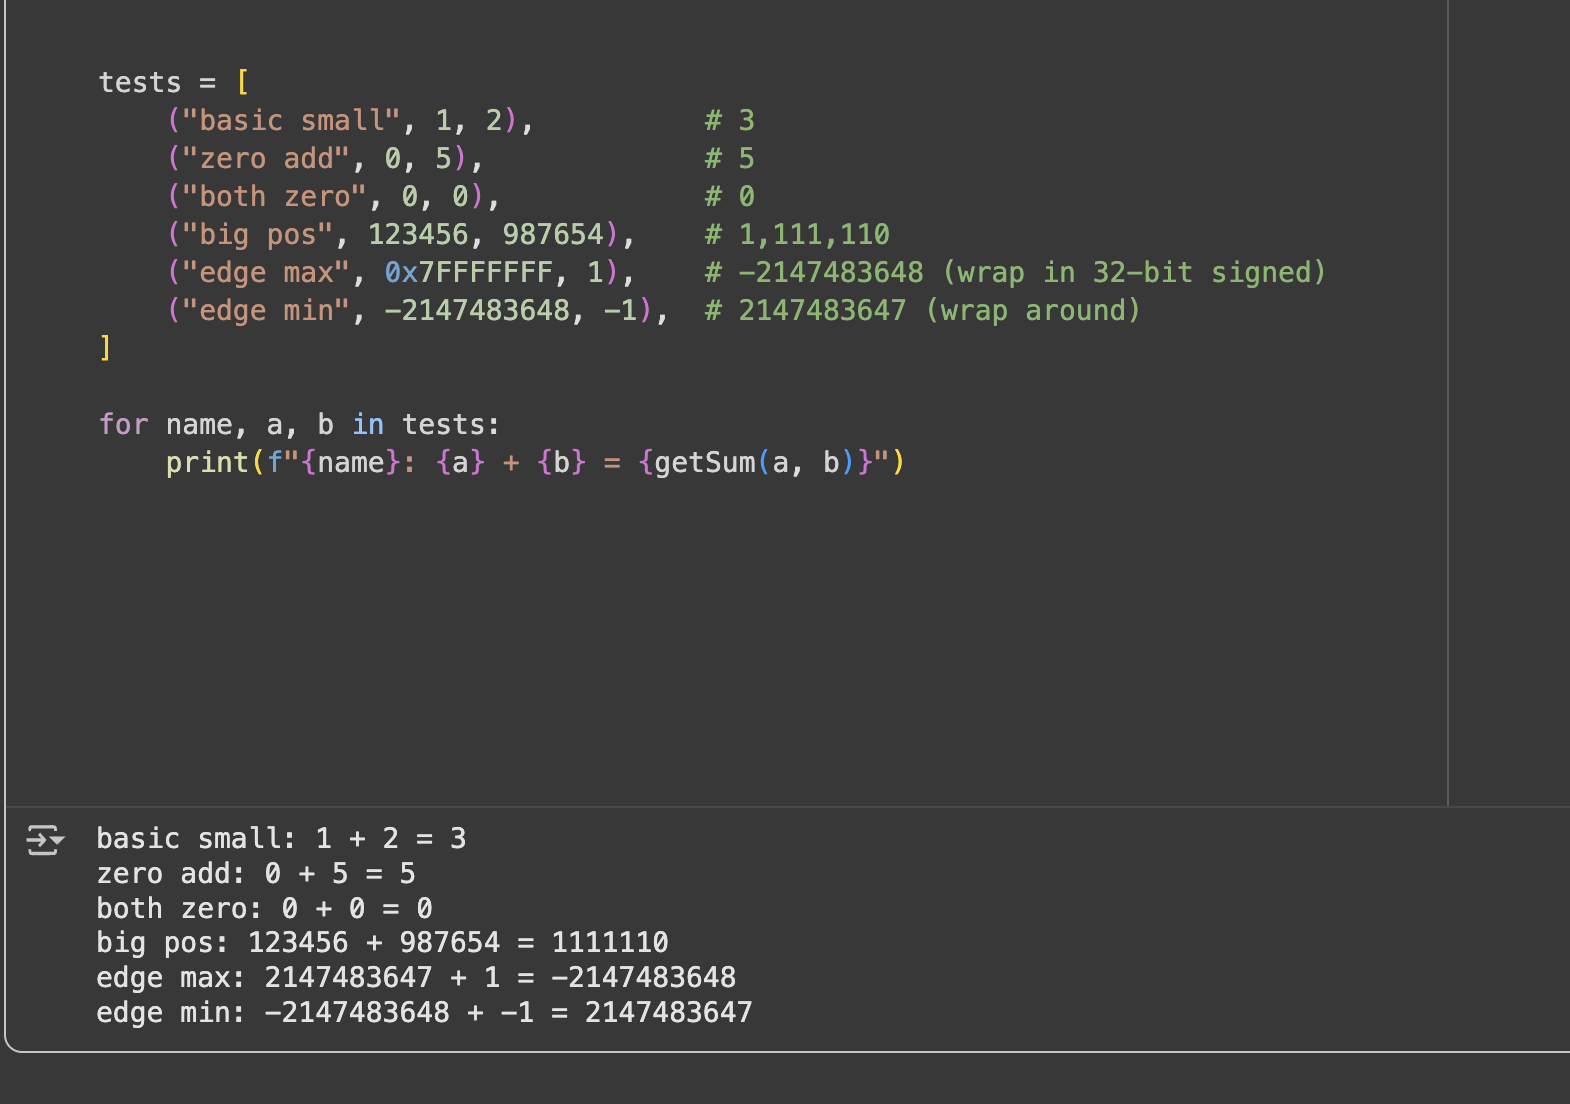

4. Review and Fixes

In [ ]:
#Fix 1: 32 bit handling

#Draft version
"""
 while b != 0:
     s = a ^ b
     c = (a & b) << 1
     a, b = s, c
 return a
"""
 #Fixed Version: Added 32 bit "masking," so the logic stays within the bit range.
"""
 while b != 0:
    s = (a ^ b) & 0xFFFFFFFF
    c = ((a & b) << 1) & 0xFFFFFFFF
    a, b = s, c
"""

#Fix 2: Signed output
# Draft version:
"""
 return a
"""
# Fixed version: Return signed version when the result’s high bit is set.
"""
MAX = 0x7FFFFFFF
MASK = 0xFFFFFFFF
return a if a <= MAX else ~(a ^ MASK)
"""

5. Reflection on Contribution

1. In the final code I used ChatGPT to help me realize that my original version wasn't the best option for handling negative numbers corectly. As I have metniond it helped me understand to use bit masking as python doesn't automatically do that for you
2. ChatGPT also helped me add the Max and Mask values as I didn't realize how usful those could be to my code.
3. I came up with the testing examples for the code on my own and a lot of the formatting from the original draft code I came up with myself as well (along with the help from the solutions tab).

**2. Convert Date to Binary**

1. Understanding and Breakdown

Goal:
- The input will be the normal date string, and goal is to convert year, day and month to binary (no leading 0's), and return them with joined dashes.

Datatypes:
- Input: str
- Output: str
- Working: int

Operations possibly being used:
- split - get y,m,d
- int - convert to numbers
- f string or join to combine

Data structures:
 - Just strings and tiny tuple/list.

 Pillars of computation:
 - Decomposition: Treat year, month, date, identically.
 - Pattern recognition: Same transform for each token
 - Abstraction: ignore calender semantics
 - Algorithmic Thinking: time-per token

Flow Chart:

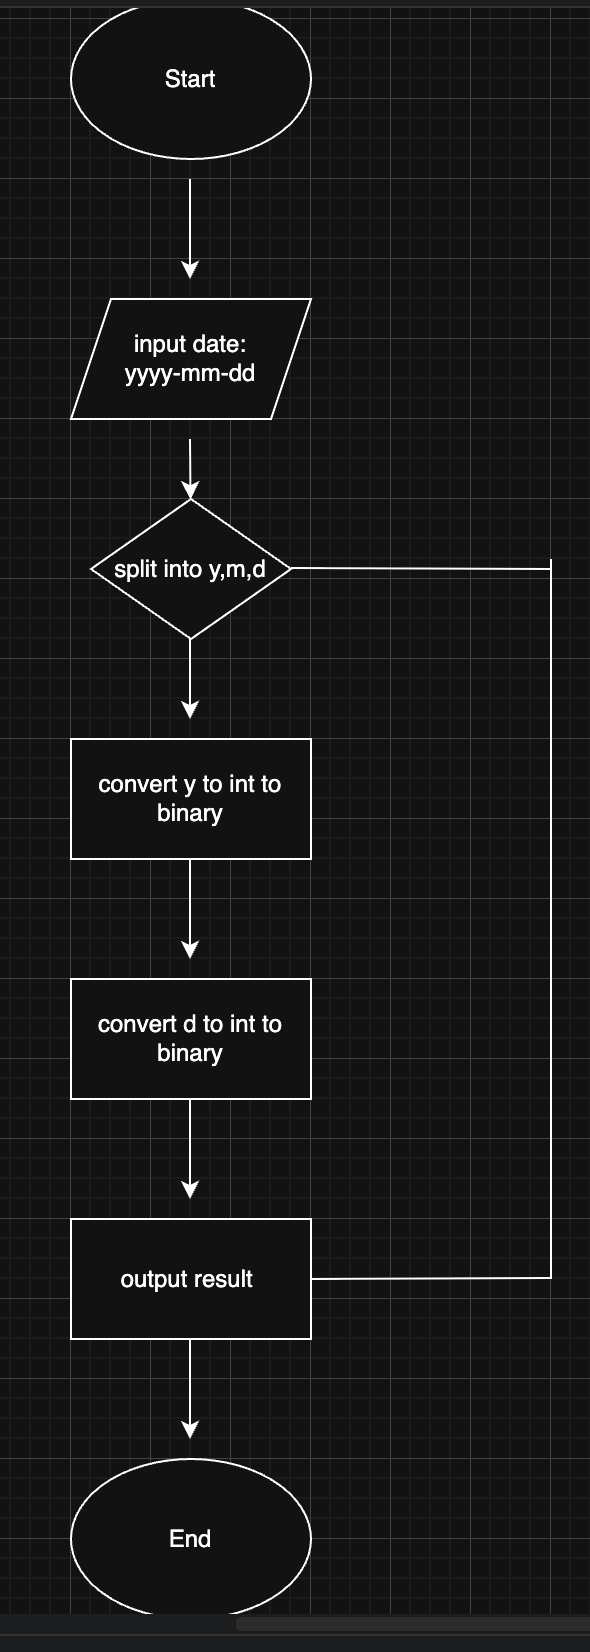








2. Peer Review and Draft code

link: https://leetcode.com/problems/convert-date-to-binary/solutions/7279503/clean-simple-beats-easy-to-understand-efficient/

In [ ]:
def convertDateToBinary(date: str) -> str:
    parts = date.split('-')            # ["YYYY","MM","DD"]
    bins = []
    for token in parts:                # convert each uniformly
        n = int(token)
        bins.append(bin(n)[2:])
    return '-'.join(bins)


    """
    In this code I noticed that converting to int first is key so I took that
    as inspiration for my own code. As well as each three of the 'parts,' of
    the code can be processed uniformly.
    """





3. Final Correct Code

In [5]:
# Final working solution: Convert Date to Binary
# AI Disclaimer: I used ChatGPT to make the code run a lot more smoohtly, like adding a function within a function as a means to bettering the code. And overall Ai helped me making the code more effiencient.

def convertDateToBinary(date: str) -> str:

    parts = date.split('-') #splitting into 3
    if len(parts) != 3:
        raise ValueError("Input must be in 'yyyy-mm-dd' format")

    def to_binary(x: str) -> str: #converting string number to binary
        return format(int(x), 'b')

    by, bm, bd = map(to_binary, parts) #return it
    return f"{by}-{bm}-{bd}"



Test code Screenshot:
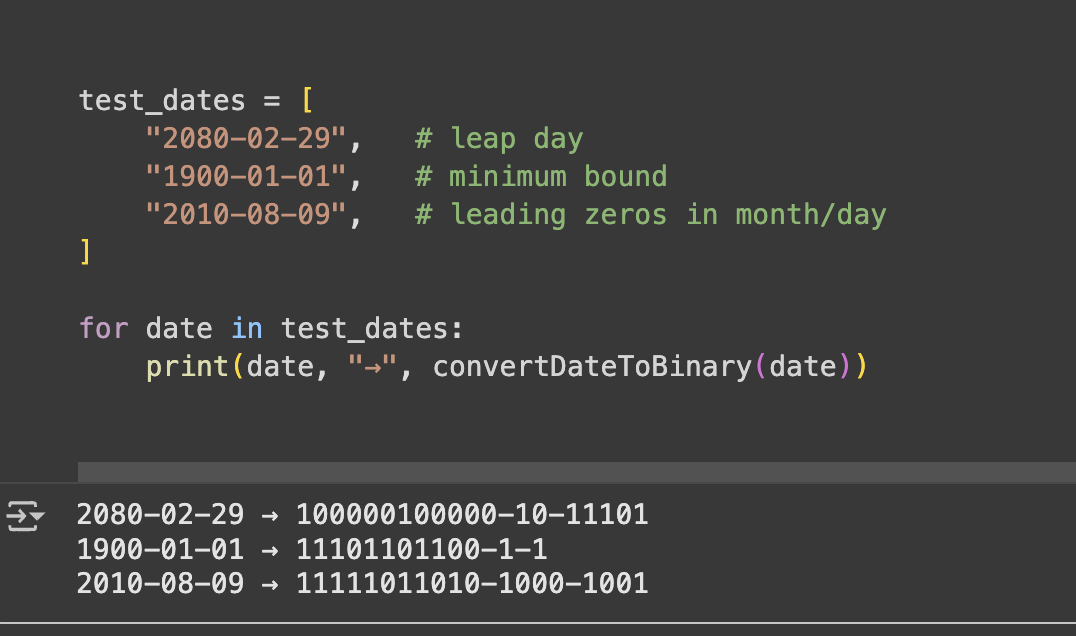

4. Review and Fixes

In [7]:
#Fix 1: reduce repition

#Draft Version:
"""
def convertDateToBinary(date: str) -> str:
    parts = date.split('-')
    bins = []
    for token in parts:
        n = int(token)
        bins.append(bin(n)[2:])
    return '-'.join(bins)
"""
#Fixed Version:
"""
def convertDateToBinary(date: str) -> str:
    parts = date.split('-')

    def to_binary(x: str) -> str:
        return format(int(x), 'b')

    return '-'.join(map(to_binary, parts))
"""
#Fix 2: light validation + docs

#Draft Version
"""
def convertDateToBinary(date: str) -> str:
    parts = date.split('-')
    bins = []
    for token in parts:
        n = int(token)
        bins.append(bin(n)[2:])
    return '-'.join(bins)
"""
#Fixed Version:
"""
def convertDateToBinary(date: str) -> str:

    parts = date.split('-')
    if len(parts) != 3:
        raise ValueError("Expected format 'yyyy-mm-dd'")

    def to_binary(x: str) -> str:
        return format(int(x), 'b')

    y, m, d = map(to_binary, parts)
    return f"{y}-{m}-{d}"



  The two areas I fixed and and improved were adding a docstring as well as
  reducing repition while making the conversion a lot cleaner

  """





"\ndef convertDateToBinary(date: str) -> str:\n    parts = date.split('-')\n    bins = []\n    for token in parts:\n        n = int(token)\n        bins.append(bin(n)[2:])\n    return '-'.join(bins)\n"

5. Reflection on Contribution

1. I used ChatGPT to help me find better ways to convert date parts to binary, as I was not using the most efficnent method before hand
2. As is common for me too ChatGPT helped me with edge cases as those are a area of struggle for me.
3. This one I needed more help with overall structure vs the previous problem for example but again I did do almost all the draft myself (again besides inspo from solution,) and as well coming up with test examples to try.

**3. Number of 1 Bits**

1. Understanding and Breakdown

Goal:
- When given an integer, end up returning the count of 1 bits in its 32-bit reprsentation.

Datatypes:
- Input: integr n
- Output: integer (count)

Operations:
- Shift and check
- Kernighan popcount

Algorithmic thinking:
- Initizalize a counter to 0
- While n is greater then 0: check if least bit is 1, if true add counter then shift n to the right by 1.
- After all bits processed return counter in the end.

Pillars of Computation:
- Problem Decomposition: Counts active bits by individual after breaking down.
- Pattern Recognition: seeing right shifts and bitwise can count bits to a high degree.
- Abstraction: Instead of looking a the number as a whole, treat it as a stream of bits.
- Algorithmic: Using loop.

Flowchart:
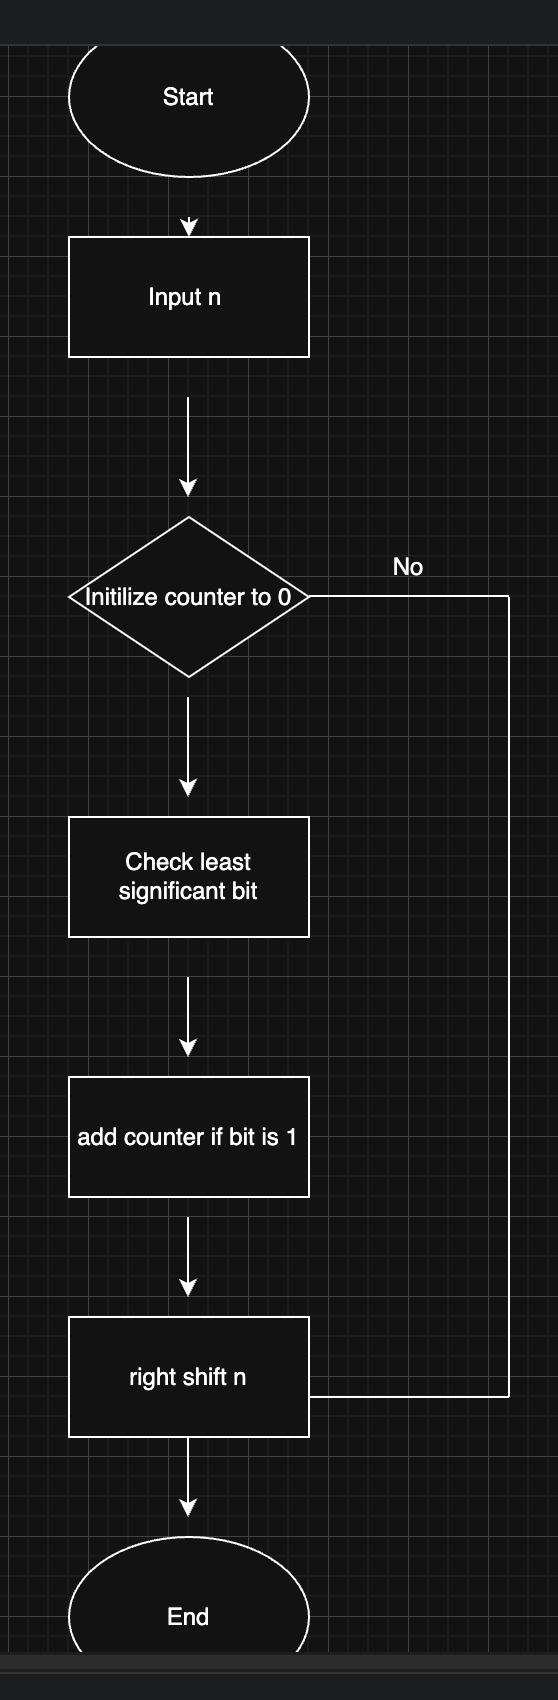

2. Peer Review and Draft code

Link: https://colab.research.google.com/drive/1D_RYwnXqeEFRnLkc1AneV2rjvhuv9vwE?usp=sharing#scrollTo=87bcdc76

In [2]:
def hammingWeight(n: int) -> int:

    ones = 0

    while n:
        if n & 1:          # check LSB
            ones += 1
        n >>= 1            # shift to examine the next bit
    return ones

    """
    Here I only used brief inspiration from the leetcode solution. But from it
    I kept the idea of bitwise inspection (& 1).



3. Final Correct Code

In [5]:
def hammingWeight(n: int) -> int:


    count = 0
    while n:
        # Use bit manipulation to remove the rightmost '1'
        n &= (n - 1)
        count += 1
    return count



#In the final code AI (ChatGPT) helped me take the next step that I sort of built inspiration
#from originally. It helped me use the n & n-1 trick, to remove the right bit instead of a less simple method,
#converting it to a binary string. Also just a few touchups with overall readability and structrue.


Test code outcomes:
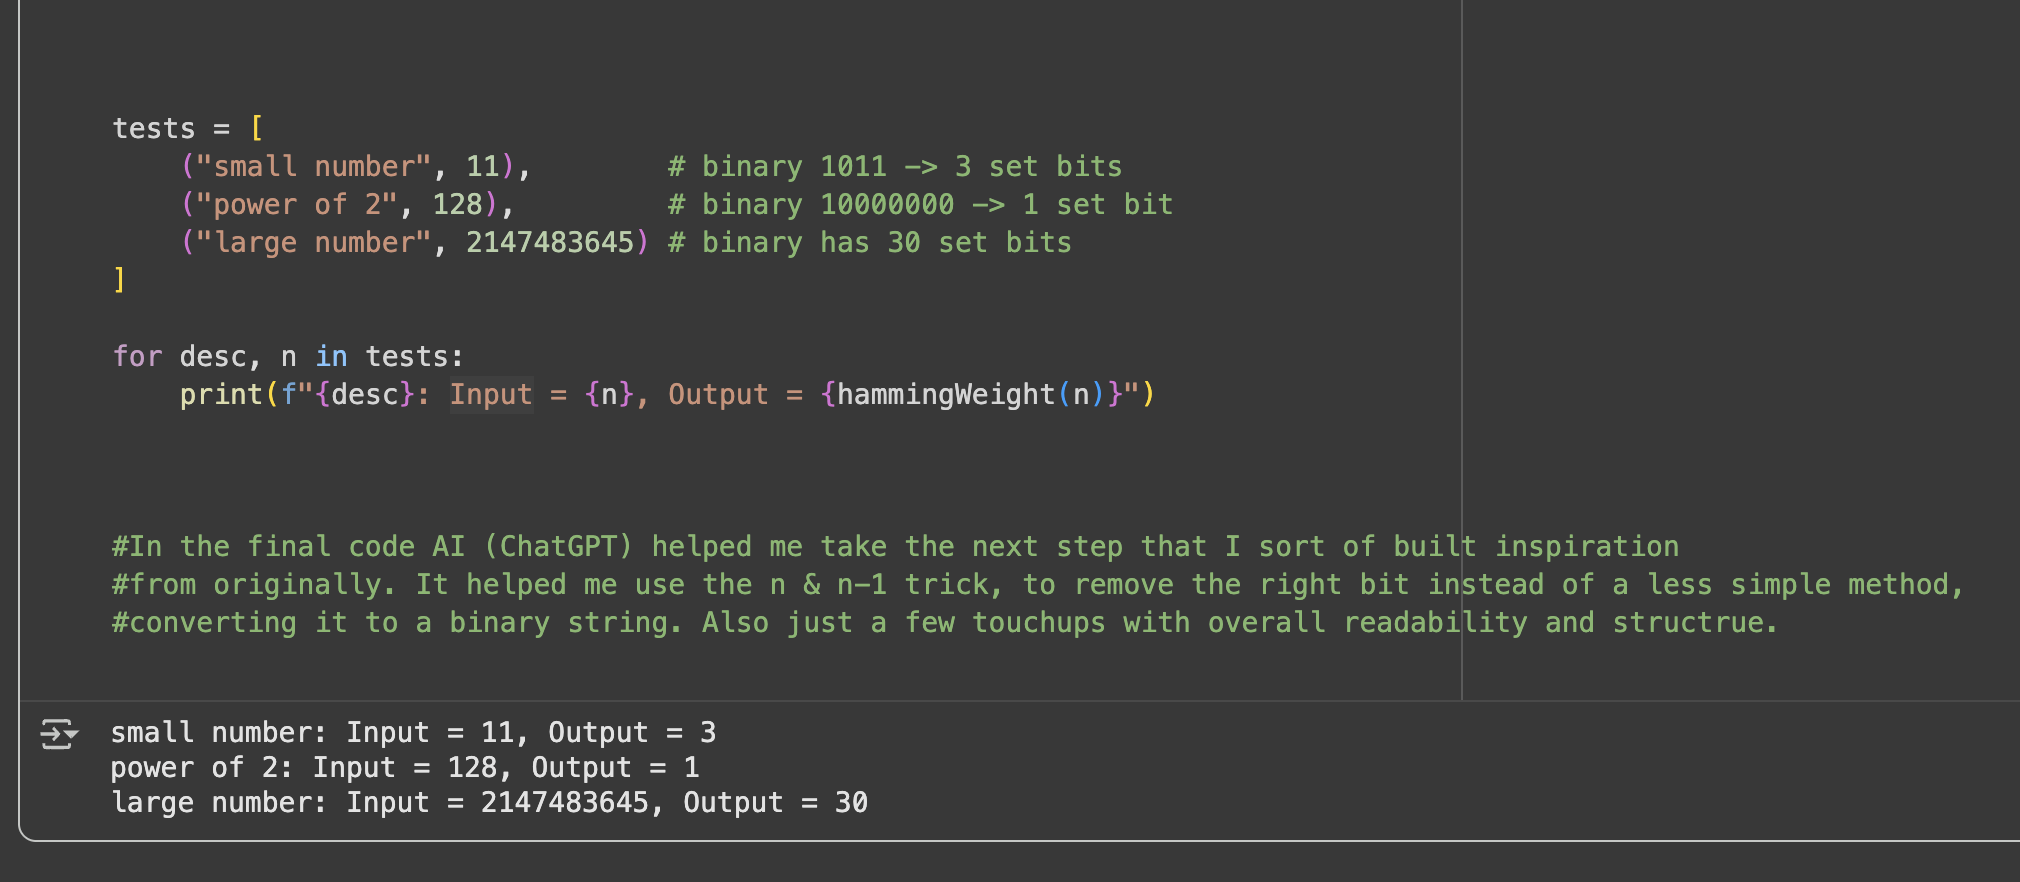

4. Review and Fixes

In [10]:
#Fix 1: Replace bit by bit checking with bit clearing trick

#Draft Version:
"""
def hammingWeight(n: int) -> int:
    ones = 0
    while n:
        if n & 1:           # check least significant bit
            ones += 1
        n >>= 1             # shift right to check next bit
    return ones
"""
#Fixed Version:
"""
def hammingWeight(n: int) -> int:

    ones = 0
    while n:
        n &= n - 1          # removes rightmost 1 bit
        ones += 1
    return ones
"""


#Fix 2: Add docstrings for readability, overall simplicity

#Draft Version:
"""
def hammingWeight(n: int) -> int:
    ones = 0
    while n:
        if n & 1:
            ones += 1
        n >>= 1
    return ones
"""

#Fixed Version:
"""
def hammingWeight(n: int) -> int:

    count = 0
    while n:
        n &= n - 1
        count += 1
    return count
"""





'\ndef hammingWeight(n: int) -> int:\n    ones = 0\n    while n:\n        if n & 1:\n            ones += 1\n        n >>= 1\n    return ones\n'

5. Reflection on Contribution

1. As mentioned I use ChatGPT to help me realize and understand I could use bitwise operations like & for example.
2. I also used ChatGPT in practice for logic of while loop
3. I had the original structure understood and down myself but using the AI helped make things a lot more cleaner especially with the n-1 ect.

**Part 1 Comparrison**




Similar Ideas Across all 3 Problems:

Core Operations:
- All are bit centric (sum of two integers, date -> binary, number of 1 bits)

Algorithmic:
- Each solution for the problems is a small loop-driven pipeline.

Edge Case Discipline:
- Must define constraints up front, and guard before the loop.




# Part 2: Recursion Problems

**1. Reverse Integer**




1. Understanding and Breakdown

Goal:
- Given a 32 bit integer x, return number formed by reversing digits.

Subproblems being solved:
- One recursive step remvoes thelast diigt of i and pushes it to end.

Base Case + Recursive step:
- Base case: when i == 0 return acc (nothing left to peel).
- Recursive step: digit i % 10

The recursion why:
- Tail/paramenterized recursion (pass built in acc).
  - It mirrors pop and push digit logic, but expressed recursively.
  - Easy to reason about overflow, while pushing new digit.

Overflow/Constraint handling:
- Because pyhton ints do not overflow, we simulate 32 bit in a way by clamping to int-min and int-max and if it exceeds return 0.

Compare to other recursive problems:
- Unlike divide and conquer (reverse pairs), this code is a single branch.

Compare to iterative solution:
- Recursion is much more simple and clear for peel and append logic while iterative settles for using constant stack.

What needs to be changed:
- For head recursion: first recurse on i // 10 then return diigt * 10^k + rest
- For tail recursion: pass acc.


Pillars of computation:
- Problem Decomposition: Broke the reversal process into smaller steps — extracting digits and rebuilding the number.
- Pattern Recognition: Noticed that each step repeats with the same digit extraction and placement.
- Abstraction: Focused only on logic (reversing digits) and ignored extra arithmetic details.
- Algorithmic Thinking: Used recursion to process one digit at a time until no digits remain.

Flow Chart:
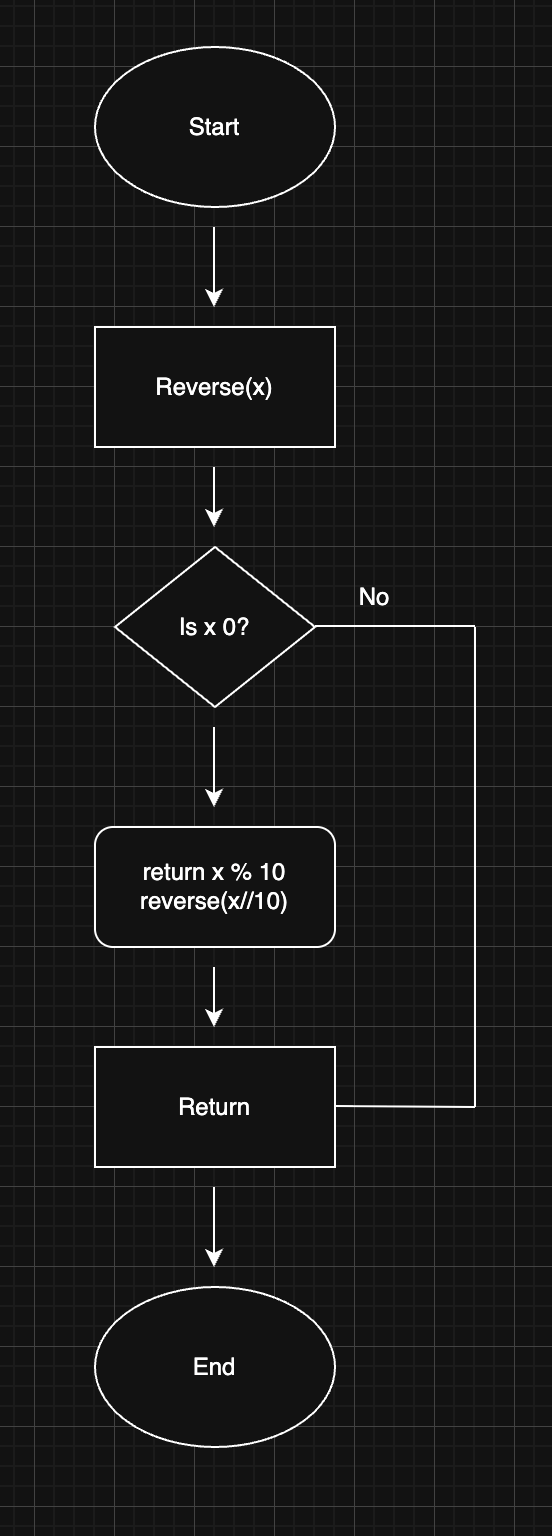


2. Peer Review and Draft code

Link: https://leetcode.com/problems/reverse-integer/solutions/7261432/clean-simple-beats-easy-to-understand-efficient/

In [ ]:
def reverseInteger(x: int) -> int:

    # Store the sign separately
    sign = -1 if x < 0 else 1
    x = abs(x)

    rev = 0
    # Loop through digits to reverse the number
    while x != 0:
        digit = x % 10             # get last digit
        rev = rev * 10 + digit     # add it to reversed number
        x = x // 10                # remove last digit

    rev = rev * sign               # reapply sign

    # Check if it fits within 32-bit range
    if rev < -2**31 or rev > 2**31 - 1:
        return 0

    return rev

    #for this code I used some inspiration from the solution in relation to sign
    #handling and range check





3. Final Correct Code

In [14]:
def reverseInteger(x: int) -> int:
    INT_MIN = -2**31           # -2147483648
    INT_MAX =  2**31 - 1       #  2147483647

    sign = -1 if x < 0 else 1
    x = abs(x)

    rev = 0
    while x != 0:
        digit = x % 10
        x //= 10

        if sign == 1:
            # Target bound: 2147483647
            if rev > INT_MAX // 10 or (rev == INT_MAX // 10 and digit > INT_MAX % 10):
                return 0
        else:
            # For negatives the magnitude limit is 2147483648
            MAG_MAX = 2**31        # 2147483648
            if rev > MAG_MAX // 10 or (rev == MAG_MAX // 10 and digit > MAG_MAX % 10):
                return 0

        rev = rev * 10 + digit

    return sign * rev



    #To make my code better I used ChatGPT to refresh the exact pre-overflow guard pattern,
    #and to double check the 32 bit limits, as well as making the code more efficent and smooth.


Test code: 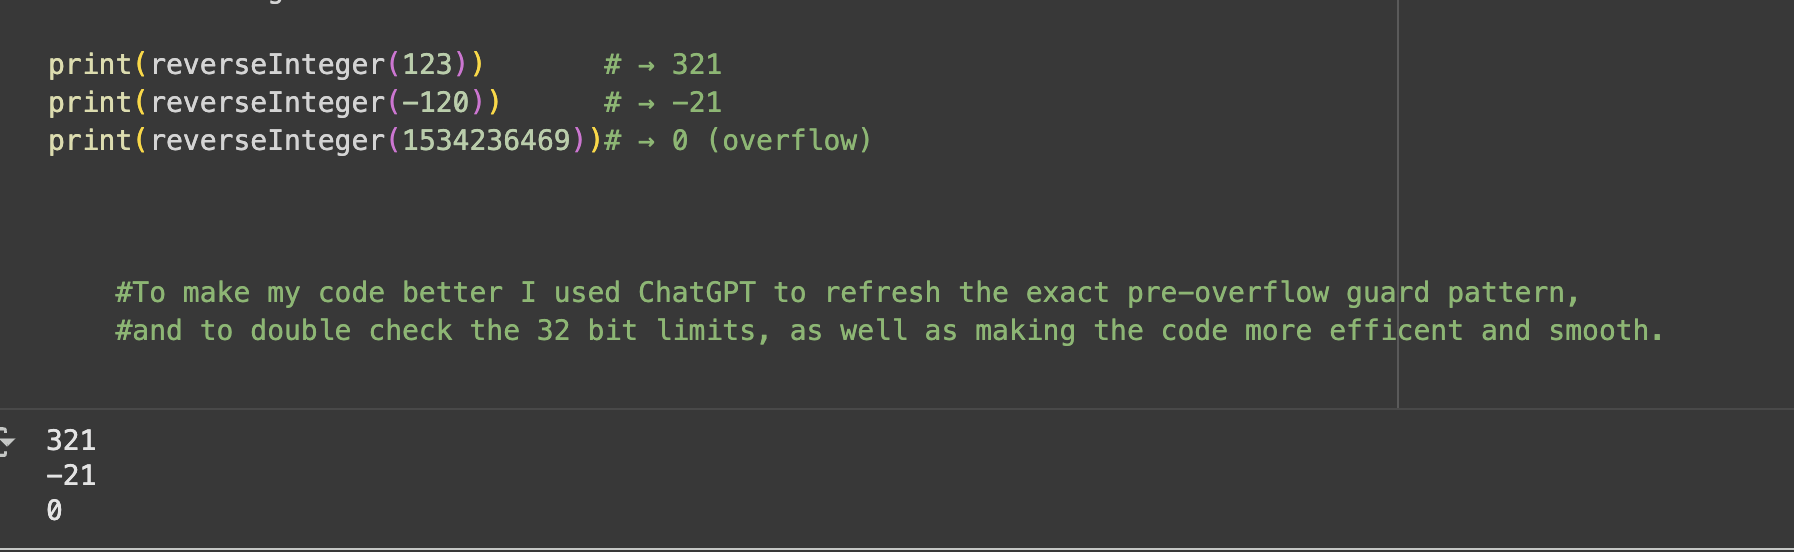

4. Review and Fixes

In [17]:
#Fix 1: Adds more overflow safety in new code

#Draft Version:
"""
def reverseInteger(x: int) -> int:
    # Store the sign separately
    sign = -1 if x < 0 else 1
    x = abs(x)

    rev = 0
    # Loop through digits to reverse the number
    while x != 0:
        digit = x % 10              # get last digit
        rev = rev * 10 + digit      # add it to reversed number
        x = x // 10                 # remove last digit

    rev = rev * sign                # reapply sign

    # Check if it fits within 32-bit range
    if rev < -2**31 or rev > 2**31 - 1:
        return 0
    return rev
"""

#Fixed Version:
"""
def reverseInteger(x: int) -> int:
    INT_MIN = -2**31           # -2147483648
    INT_MAX =  2**31 - 1       #  2147483647

    sign = -1 if x < 0 else 1
    x = abs(x)

    rev = 0
    while x != 0:
        digit = x % 10
        x //= 10

        if sign == 1:
            # Target bound: 2147483647
            if rev > INT_MAX // 10 or (rev == INT_MAX // 10 and digit > INT_MAX % 10):
                return 0
        else:
            # For negatives the magnitude limit is 2147483648
            MAG_MAX = 2**31        # 2147483648
            if rev > MAG_MAX // 10 or (rev == MAG_MAX // 10 and digit > MAG_MAX % 10):
                return 0

        rev = rev * 10 + digit

    return sign * rev
"""

#Fix 2: Checks before updating rev instead of after

#Draft Version:
"""
if rev < -2**31 or rev > 2**31 - 1:
    return 0
"""

#Fixed Version:

"""
if rev > INT_MAX // 10 or (rev == INT_MAX // 10 and digit > INT_MAX % 10):
    return 0
"""



'\nif rev > INT_MAX // 10 or (rev == INT_MAX // 10 and digit > INT_MAX % 10):\n    return 0\n'

5. Reflection on Contribution

1. I used ChatGPT to double check the overflow logic as that is a area I have not delved into much with coding
2. I as well used ChatGPT to check my recursive flow logic and allow a few small tweaks in places they may be needed.
3. I reworked the specific loop that reverses digits as that is something I have also done in other classes so I felt I had the ability to tackle that on my own.

**2. Reverse String**

1. Understanding and Breakdown

- Unlike other understanding and breakdowns up to this point I did use AI, in particular here I used it for conceptual clarification.

Goal:
- Have to reverse a string of characters in place (so without creating a new list).

Subproblems being solved:
- At all recursive steps, function swaps characters at start and finish. Then it will continue to call itslef on substring until the two pointers meet or cross.

Base Case and Recursive Step:
- Base case: When the left pointer is >= right pointers, function stops
- Recursive Step: Swap the two characters at left and right, then call that same function with left and right + 1.

Recursion Type:
- This is tail recursion, because the recursive call is the last operation in the function.

Solution Combo:
- Each call work on same array so no real combination is needed.

Comparrison to other Rescursive Problems:
- This is similar to other divide and conquer problems (eg. reversing linked lists or recursively sorting).

Comparrison to Iterative:
- Iterative approach in this case whould use a While loop, recursive version rpelaces this loop with a repeated function.

Pillars of Computation:
- Problem Decomposition:
The problem can be broken into smaller parts by swapping the first and last letters, then reversing the inside portion until only one or no letters remain.
- Pattern Recognition:
This follows a common recursive pattern where each step solves a smaller version of the same problem, like reversing arrays or lists.
- Abstraction:
We can think of it simply as “reverse the rest after handling the ends,” which keeps the logic clean and easy to follow.
- Algorithmic Thinking:
The steps are straightforward: check the base case, swap both ends, then call the function again on the middle part until the whole string is reversed.

Flow Chart:
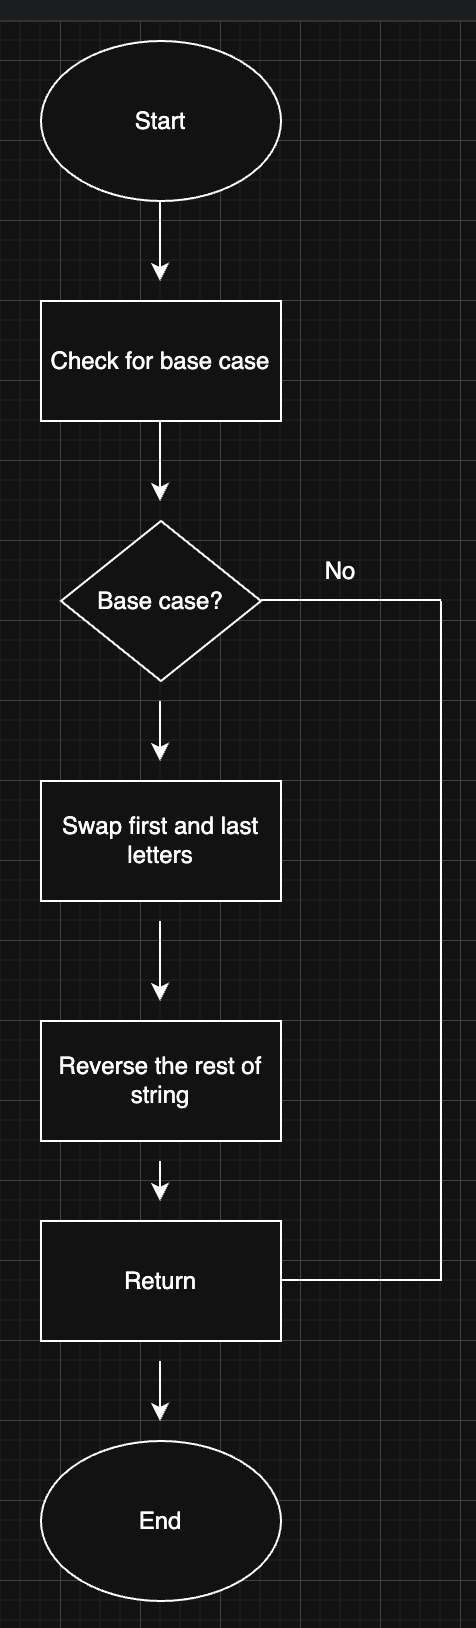



2. Peer Review and Draft code

Link: https://leetcode.com/problems/reverse-string/solutions/6635496/master-the-in-place-swap-trick-to-reverse-any-string-efficiently/

In [ ]:

from typing import List #using list as a type hint

def reverseString(s: List[str]) -> None:

    def helper(l: int, r: int) -> None:
        # base case: pointers crossed or met
        if l >= r:
            return

        # swap the ends (in-place)
        s[l], s[r] = s[r], s[l]

        # recursive step: move inward
        helper(l + 1, r - 1)

    helper(0, len(s) - 1)


    #for this problem I had a lot of my own structure this draft but some areas I drew inspiration from the leetcode solution is,
    #the two pointer idea, I used that same pattern but with recursion instead of a while loop and as well as constraint awareness which is common
    #for me to draw inspiration from in these problems I find.




3. Final Correct Code

In [2]:
from typing import List #using list as type hint

def reverseString(s: List[str]) -> None:
   # Guard for trivial inputs (keeps recursion from doing work it doesn't need)
    if len(s) < 2:
        return

    def rec(i: int, j: int) -> None:
        # Base case: pointers crossed or met -> done
        if i >= j:
            return
        # Swap ends, then recurse inward
        s[i], s[j] = s[j], s[i]
        rec(i + 1, j - 1)

    rec(0, len(s) - 1)


    #I used ChatGPT here to help me make this code even better. First for shapers base cases and bounds.
    #Also for the inplace swap, (the s[i] ect). For tiny guard and as well for overall naming
    #and layout just to make it a little bit more cleaner.








Practice code:
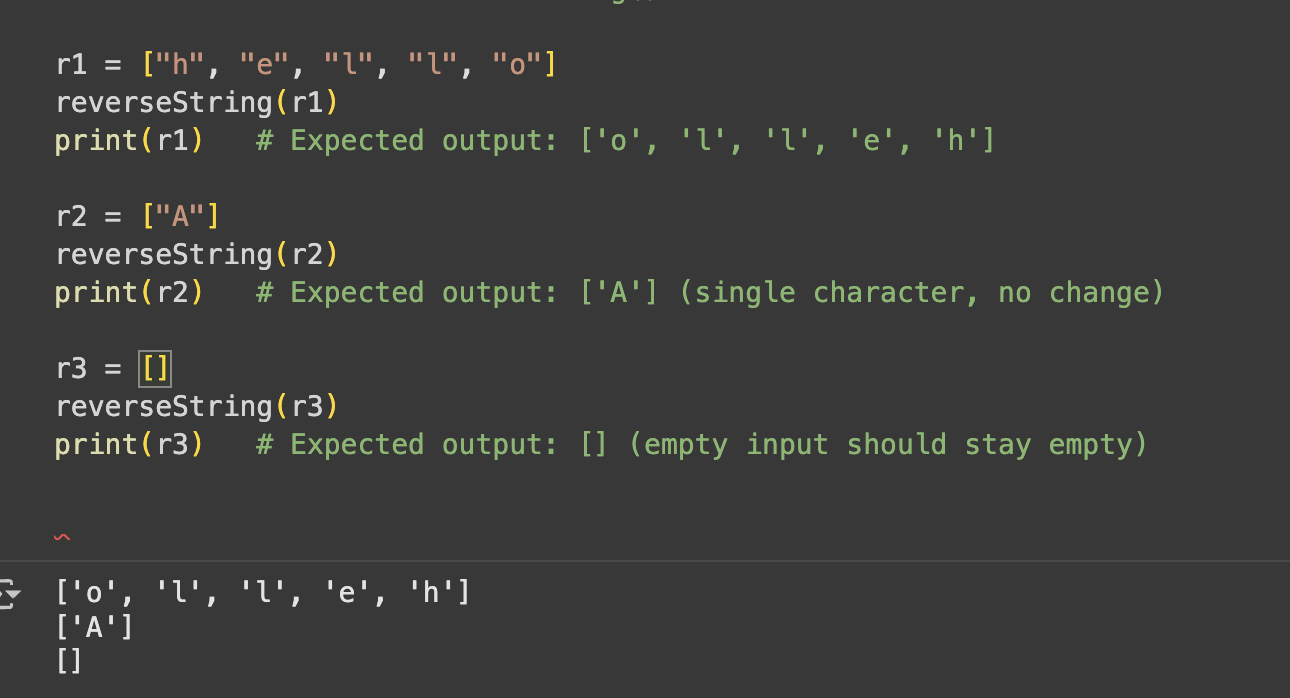

4. Review and Fixes

In [6]:
#Fix 1: Adding a trivial guard

#Draft Version:
"""
def reverseString(s: List[str]) -> None:
    def helper(l: int, r: int) -> None:
        if l >= r:
            return
        s[l], s[r] = s[r], s[l]
        helper(l + 1, r - 1)

    helper(0, len(s) - 1)

"""

#Fixed Version:
"""
from typing import List

def reverseString(s: List[str]) -> None:
    # NEW: quick exit for trivial inputs
    if len(s) < 2:
        return

    def rec(i: int, j: int) -> None:
        if i >= j:
            return
        s[i], s[j] = s[j], s[i]
        rec(i + 1, j - 1)

    rec(0, len(s) - 1)
"""

#Fix 2: Clarify helper contract and structure

#Draft Version:
"""
def helper(l: int, r: int) -> None:
    if l >= r:
        return
    s[l], s[r] = s[r], s[l]
    helper(l + 1, r - 1)
"""

#Fixed Version:
"""
def rec(i: int, j: int) -> None:
    # Base case: pointers crossed/met
    if i >= j:
        return
    # Do work, then recurse inward
    s[i], s[j] = s[j], s[i]
    rec(i + 1, j - 1)
"""



'\ndef rec(i: int, j: int) -> None:\n    # Base case: pointers crossed/met\n    if i >= j:\n        return\n    # Do work, then recurse inward\n    s[i], s[j] = s[j], s[i]\n    rec(i + 1, j - 1)\n'

5. Reflection on Conribution

1. As mentioned I use ChatGPT to spot and edge case I had not considered originally.
2. Also as I do with basically every code I write these days I used ChatGPT to help me make my code smoother and easier to read, and overall just to make the flow of the code better.
3. The pointer mover logic I was able to decode on my own and tesy myself to make sure it was all working correctly.

1. Brett Byers
2. 001
3. 20464377
4. Github link